<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%207/R/Week7_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install packages
install.packages(c("haven", "fixest","modelsummary", "olsrr", "caret","randomForest", "cv", "ISLR2"))

library(ggplot2)
library(haven)
library(fixest)
library(modelsummary)
library(olsrr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




In [2]:
#load data
Data.File<-"https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%207/data/AJR2001.dta"
Data<-read_dta(Data.File)

In [3]:
head(Data)

longname,shortnam,logmort0,risk,loggdp,campaign,source0,slave,latitude,neoeuro,⋯,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angola,AGO,5.634789,5.36,7.77,1,0,0,0.1367,0,⋯,5.634789,5.521461,5.521461,1,0.95000,1,250.00,5.521461,250.00,5.521461
Argentina,ARG,4.232656,6.39,9.13,1,0,0,0.3778,0,⋯,4.034241,4.232656,4.034241,0,0.00000,0,30.50,3.417727,15.07,2.712706
Australia,AUS,2.145931,9.32,9.90,0,0,0,0.3000,1,⋯,2.145931,2.145931,2.145931,0,0.00000,0,8.55,2.145931,8.55,2.145931
Burkina Faso,BFA,5.634789,4.45,6.85,1,0,0,0.1444,0,⋯,5.634789,5.521461,5.521461,1,0.95000,1,250.00,5.521461,250.00,5.521461
Bangladesh,BGD,4.268438,5.14,6.88,1,1,0,0.2667,0,⋯,4.268438,4.268438,4.268438,0,0.12008,0,71.41,4.268438,71.41,4.268438
Bahamas,BHS,4.442651,7.50,9.29,0,0,0,0.2683,0,⋯,4.442651,4.442651,4.442651,0,NA,0,85.00,4.442651,85.00,4.442651


In [4]:
dim(Data)

[1] 64 31

In [5]:
str(Data)

tibble [64 × 31] (S3: tbl_df/tbl/data.frame)
 $ longname        : chr [1:64] "Angola" "Argentina" "Australia" "Burkina Faso" ...
  ..- attr(*, "label")= chr "full country name"
  ..- attr(*, "format.stata")= chr "%19s"
 $ shortnam        : chr [1:64] "AGO" "ARG" "AUS" "BFA" ...
  ..- attr(*, "label")= chr "3 letter country name"
  ..- attr(*, "format.stata")= chr "%22s"
 $ logmort0        : num [1:64] 5.63 4.23 2.15 5.63 4.27 ...
  ..- attr(*, "label")= chr "Original Log Settler Mortality"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ risk            : num [1:64] 5.36 6.39 9.32 4.45 5.14 ...
  ..- attr(*, "label")= chr "Exp Risk"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ loggdp          : num [1:64] 7.77 9.13 9.9 6.85 6.88 ...
  ..- attr(*, "label")= chr "Log GDP per capita (PPP) in 1995"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ campaign        : num [1:64] 1 1 0 1 1 0 1 1 0 1 ...
  ..- attr(*, "label")= chr "Original mortality from campaign"
  ..- attr(*, "format.stata")= chr

`geom_smooth()` using formula = 'y ~ x'


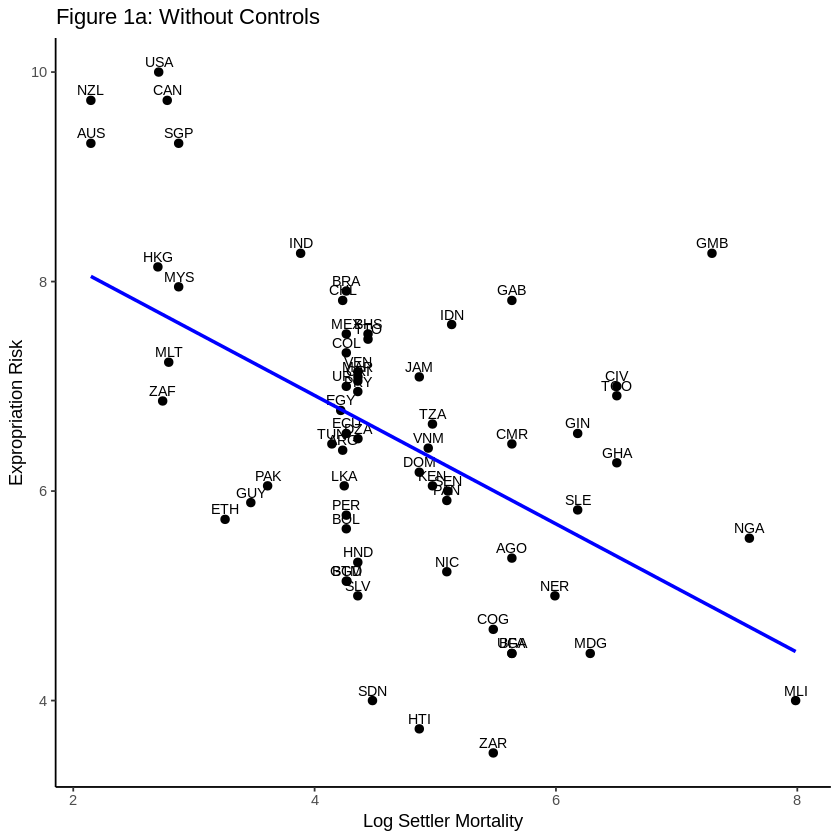

In [6]:
# Fig1b: Remove latitude and continent dummies

ggplot(Data, aes(x = logmort0, y = risk)) +
  # Add scatter points
  geom_point(size = 2) +
  # Add text labels for each point
  geom_text(aes(label = shortnam),
            vjust = -0.5,  # Adjust vertical position of text
            size = 3) +  # Text size
  # Add linear fit line
  geom_smooth(method = "lm",
              se = FALSE,  # Without error bands
              color = "blue") +
  # Customize titles and labels
  labs(title = "Figure 1a: Without Controls",
       x = "Log Settler Mortality",
       y = "Expropriation Risk") +
  # Customize theme and scale
  theme_classic() +  # White background and clean design
  scale_y_continuous(breaks = seq(4, 10, by = 2))

`geom_smooth()` using formula = 'y ~ x'


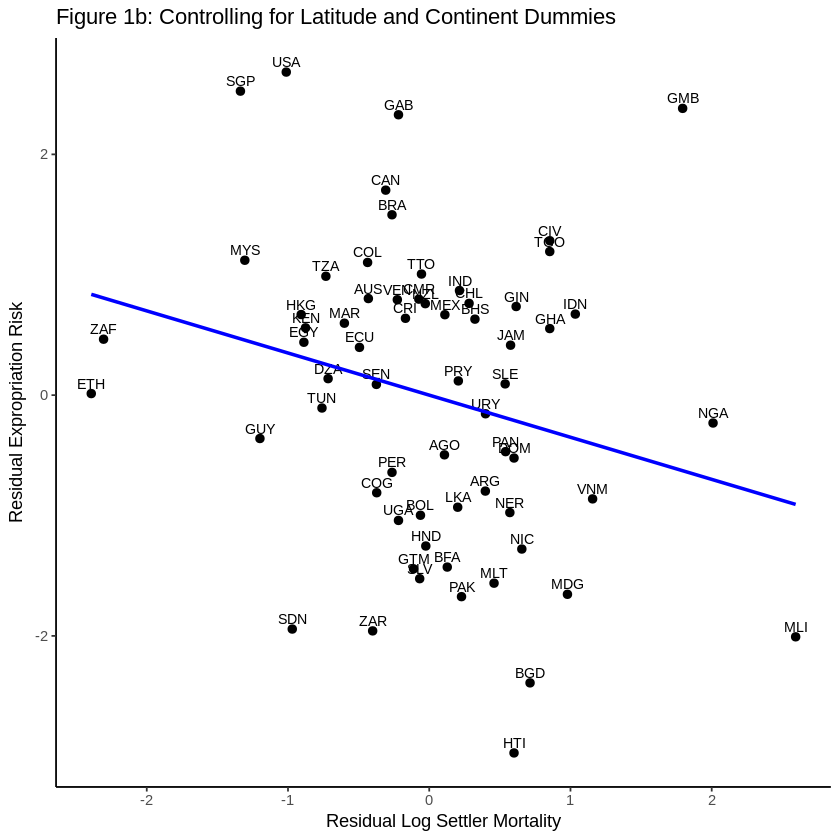

In [7]:
# Fig1b: Remove latitude and continent dummies

model1 <- lm(risk ~ asia + africa + other + latitude, data = Data)
Data$Rrisk <- residuals(model1)

# Second regression to get Rlmort
model2 <- lm(logmort0 ~ asia + africa + other + latitude, data = Data)
Data$Rlmort <- residuals(model2)

ggplot(Data, aes(x = Rlmort, y = Rrisk)) +
  # Add scatter points
  geom_point(size = 2) +
  # Add text labels for each point
  geom_text(aes(label = shortnam),
            vjust = -0.5,  # Adjust vertical position of text
            size = 3) +  # Text size
  # Add linear fit line
  geom_smooth(method = "lm",
              se = FALSE,  # Without error bands
              color = "blue") +
  # Customize titles and labels
  labs(title = "Figure 1b: Controlling for Latitude and Continent Dummies",
       x = "Residual Log Settler Mortality",
       y = "Residual Expropriation Risk") +
  # Customize theme and scale
  theme_classic() +  # White background and clean design
  scale_y_continuous(breaks = seq(-2, 3, by = 2))

In [8]:
# TABLE 4—IV REGRESSIONS OF LOG GDP PER CAPITA

# Panel C: OLS
ols1 <- lm(loggdp ~ risk, data = Data)
ols2 <- lm(loggdp ~ risk + latitude, data = Data)
ols3 <- lm(loggdp ~ risk + latitude + africa + asia + other, data = Data)

# table
modelsummary(list(ols1,ols2, ols3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "risk"= "Expropriation risk",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+-----------------------+----------+----------+-----------+
|                       | (1)      | (2)      | (3)       |
+=======================+==========+==========+===========+
| Expropriation risk    | 0.516*** | 0.457*** | 0.396***  |
+-----------------------+----------+----------+-----------+
|                       | (0.063)  | (0.065)  | (0.060)   |
+-----------------------+----------+----------+-----------+
| Latitude              |          | 1.710*   | 0.978     |
+-----------------------+----------+----------+-----------+
|                       |          | (0.722)  | (0.641)   |
+-----------------------+----------+----------+-----------+
| Africa Dummy          |          |          | -0.879*** |
+-----------------------+----------+----------+-----------+
|                       |          |          | (0.173)   |
+-----------------------+----------+----------+-----------+
| Asia Dummy            |          |          | -0.651**  |
+-----------------------+----------+---

In [9]:
# Panel B: First Stage
fs1 <- feols(risk ~ logmort0, data = Data)
fs2 <- feols(risk ~ logmort0 + latitude, data = Data)
fs3 <- feols(risk ~ logmort0 + latitude + africa + asia + other, data = Data)

# table
modelsummary(list(fs1,fs2, fs3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "logmort0"= "Log European settler mortality",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+--------------------------------+-----------+-----------+---------+
|                                | (1)       | (2)       | (3)     |
+================================+===========+===========+=========+
| Log European settler mortality | -0.613*** | -0.517*** | -0.350+ |
+--------------------------------+-----------+-----------+---------+
|                                | (0.127)   | (0.141)   | (0.182) |
+--------------------------------+-----------+-----------+---------+
| Latitude                       |           | 2.007     | 2.001   |
+--------------------------------+-----------+-----------+---------+
|                                |           | (1.330)   | (1.383) |
+--------------------------------+-----------+-----------+---------+
| Africa Dummy                   |           |           | -0.257  |
+--------------------------------+-----------+-----------+---------+
|                                |           |           | (0.406) |
+--------------------------------

In [10]:
# Panel A: 2SLS (IV) regressions
iv1 <- feols(loggdp ~ 1 | risk ~ logmort0, data = Data)
iv2 <- feols(loggdp ~ latitude | risk ~ logmort0, data = Data)
iv3 <- feols(loggdp ~ latitude + africa + asia + other | risk ~ logmort0, data = Data)

# table
modelsummary(list(iv1,iv2, iv3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "fit_risk"= "Expropriation risk",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+-----------------------+----------+----------+---------+
|                       | (1)      | (2)      | (3)     |
+=======================+==========+==========+=========+
| Expropriation risk    | 0.929*** | 0.962*** | 1.074*  |
+-----------------------+----------+----------+---------+
|                       | (0.156)  | (0.216)  | (0.438) |
+-----------------------+----------+----------+---------+
| Latitude              |          | -0.417   | -0.994  |
+-----------------------+----------+----------+---------+
|                       |          | (1.308)  | (1.683) |
+-----------------------+----------+----------+---------+
| Africa Dummy          |          |          | -0.451  |
+-----------------------+----------+----------+---------+
|                       |          |          | (0.409) |
+-----------------------+----------+----------+---------+
| Asia Dummy            |          |          | -1.103* |
+-----------------------+----------+----------+---------+
|            

In [11]:
#define controls
controls <- c("campaign",
              "source0",
              "slave",
              "neoeuro",
              "asia",
              "africa",
              "other",
              "campaignsj",
              "campaignsj2",
              "wandcafrica",
              "wacacontested")

#esimate correlation matrix, subset to low correlation covariates
cor_table <- cor(Data[,controls],use='complete.obs')

cor_table<- apply(cor_table,c(1,2),function(x){ifelse(abs(x)>0.5,0,1)})

dim(unique(cor_table))
rowSums(cor_table[,controls])
length(controls)

[1]  7 11

campaign       source0         slave       neoeuro          asia 
            8            10             9             9            10 
       africa         other    campaignsj   campaignsj2   wandcafrica 
            8             9             8             7             8 
wacacontested 
            8

[1] 11

In [12]:
#create all possible combinations
vars <-  list()
for (i in 1: length(controls))
{
  pivot <- c(controls[i],"")
  vars <- append(vars, list(pivot))
}

In [13]:
#create all combinations

all.vars<-expand.grid(vars) # all factorial combinations
all.vars<-data.frame(all.vars)
head(all.vars)
dim(all.vars)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,campaign,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
2,,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
3,campaign,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
4,,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
5,campaign,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
6,,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested


[1] 2048   11

In [14]:
#estimate number of terms in models
all.vars$N.vars<-rowSums(apply(all.vars,2,function(x){ifelse(x!="",1,0)}))
#subset to models with at least 2 vars
dim(all.vars)
all.vars<-subset(all.vars,N.vars>=2)
dim(all.vars)
all.vars$id <-1:nrow(all.vars)
ids <- all.vars[,c("N.vars","id")]
all.vars$id<-NULL
all.vars$N.vars<-NULL
all.vars<-apply(all.vars,2,function(x) {as.character(x)})
#explore object
head(all.vars)

[1] 2048   12

[1] 2036   12

Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11
campaign,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
campaign,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
campaign,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested


In [15]:
### lets build a function to evaliate our model
performance_ols<-function(dependent.variable,treatment,controls,DataSet,id)
{
  #test code
  #dependent.variable <- "earnq16"
  #treatment <- "treatmnt"
  #controls <- all.vars[4,]
  #DataSet <- Data
  model<-as.formula(paste(dependent.variable,"~",paste(controls,collapse="+"),"+",treatment,sep=""))
  linear.model<-lm(model, data=DataSet)
  my.SSR <- deviance(linear.model) #residual sum of squares
  my.LL <- logLik(linear.model) # log likelihood statistic
  my.RSquared <- summary(linear.model)$r.squared
  my.aic <- AIC(linear.model) # Akaike information criterion
  my.treatment.effect<-summary(linear.model)$coefficients[treatment,"Estimate"]
  my.treatment.StdEror<-summary(linear.model)$coefficients[treatment,"Std. Error"]
  #my.VIF<-length(which( vif(linear.model)>2.0 ) ) # number of covariates that exceed the 2 threshold as a proxy for multicollinarity
  #  my.cor.e.y<-cor(subset(DataSet[[dependent.variable]],complete.cases(Data[,c(dependent.variable,treatment,subset(controls,controls!=""))])),as.numeric(linear.model$residuals))
  #  my.cor.e.t<-cor(subset(DataSet[[treatment]],complete.cases(Data[,c(dependent.variable,treatment, subset(controls,controls!=""))])),as.numeric(linear.model$residuals))
  my.Percent.Coeff.Sig<-length(which(summary(linear.model)$coefficients[,"Pr(>|t|)"]<0.05))/length(summary(linear.model)$coefficients[,"Pr(>|t|)"])
  results<-data.frame(SSR=my.SSR,
                      LL=my.LL,
                      RSquared=my.RSquared,
                      AIC=my.aic,
                      Effect=my.treatment.effect,
                      Std.Error.Effect=my.treatment.StdEror,
                      #Eps.T=my.cor.e.t,
                      #Eps.Y=my.cor.e.y,
                      #VIF=my.VIF,
                      Percent.Sig=my.Percent.Coeff.Sig ,
                      id = id,
                      #Controls=paste(controls,collapse="+"),
                      row.names=NULL)
  return(results)
}

In [16]:
#test the function
i<- 1
performance_ols("loggdp","risk",as.character(all.vars[i,]),Data,i)


SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.94982,-44.27818,0.7838202,116.5564,0.3385154,0.06466305,0.3846154,1


In [17]:
head(ids)
target_ids<-subset(ids,N.vars==3)$id
length(target_ids)
#for (i in 1:dim(all.vars)[1])
#for (i in 1:10)
results <- list()
for ( i in target_ids)
{
  out <- performance_ols("loggdp","risk",all.vars[i,],Data,i)
  results <- append(results, list(out))
}

,N.vars,id
,<dbl>,<int>
1,11,1
2,10,2
3,10,3
4,9,4
5,10,5
6,9,6


[1] 165

In [18]:
#post-process
#results
results <- do.call("rbind",results)
dim(results)
head(results)
summary(results)

[1] 165   8

,SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,22.13856,-56.84208,0.6798683,125.6842,0.3850847,0.05800456,0.6,256
2,22.08356,-56.76248,0.6806636,125.5250,0.3812640,0.05874839,0.6,384
3,21.41850,-55.78397,0.6902806,123.5679,0.3597217,0.05982552,0.6,448
4,22.09056,-56.77262,0.6805624,125.5452,0.3846981,0.05789933,0.6,480
5,18.86641,-51.72407,0.7271848,115.4481,0.4001782,0.05362606,0.8,496
6,21.31878,-55.63463,0.6917227,123.2693,0.3296851,0.06773549,0.6,504


      SSR              LL            RSquared           AIC       
 Min.   :18.13   Min.   :-68.69   Min.   :0.5364   Min.   :112.9  
 1st Qu.:21.91   1st Qu.:-66.08   1st Qu.:0.5727   1st Qu.:125.0  
 Median :24.79   Median :-60.46   Median :0.6416   Median :132.9  
 Mean   :25.63   Mean   :-61.11   Mean   :0.6294   Mean   :134.2  
 3rd Qu.:29.55   3rd Qu.:-56.51   3rd Qu.:0.6832   3rd Qu.:144.2  
 Max.   :32.06   Max.   :-50.46   Max.   :0.7378   Max.   :149.4  
     Effect       Std.Error.Effect   Percent.Sig           id      
 Min.   :0.3297   Min.   :0.05305   Min.   :0.4000   Min.   : 256  
 1st Qu.:0.3894   1st Qu.:0.06010   1st Qu.:0.6000   1st Qu.:1015  
 Median :0.4307   Median :0.06410   Median :0.6000   Median :1630  
 Mean   :0.4315   Mean   :0.06510   Mean   :0.6036   Mean   :1488  
 3rd Qu.:0.4716   3rd Qu.:0.06929   3rd Qu.:0.6000   3rd Qu.:1900  
 Max.   :0.5437   Max.   :0.08038   Max.   :1.0000   Max.   :2033  

In [19]:
#choose a model
decision <- subset(results, Percent.Sig>=0.8)
decision <- subset(decision, AIC<as.numeric(quantile(results$AIC,0.25)))
decision <- decision[order(decision$Std.Error.Effect),]
decision <- decision[order(decision$AIC),]
head(decision)
dim(decision)

,SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
74,18.13452,-50.45796,0.7377682,112.9159,0.4172014,0.05305049,0.8,1517
75,18.47357,-51.05073,0.7328654,114.1015,0.3829724,0.05485689,0.8,1518
67,18.72077,-51.47609,0.7292908,114.9522,0.4012214,0.05333097,0.8,1487
62,18.81326,-51.63380,0.7279533,115.2676,0.3860550,0.05644742,0.8,1455
5,18.86641,-51.72407,0.7271848,115.4481,0.4001782,0.05362606,0.8,496
72,18.89984,-51.78072,0.7267014,115.5614,0.3742853,0.06504374,0.8,1511


[1] 25  8

In [20]:
target_models <- c(72,74)
model1<-as.formula(paste("loggdp","~",paste(as.character(all.vars[target_models[1],]),collapse="+"),"+","risk",sep=""))
model2<-as.formula(paste("loggdp","~",paste(as.character(all.vars[target_models[2],]),collapse="+"),"+","risk",sep=""))
lm(model1,data=Data)
lm(model2,data=Data)


Call:
lm(formula = model1, data = Data)

Coefficients:
  (Intercept)        neoeuro           asia         africa     campaignsj  
       6.1344         0.1748        -0.7597        -0.3158        -0.3177  
  campaignsj2    wandcafrica  wacacontested           risk  
       0.3953        -0.9272         0.2475         0.3549  



Call:
lm(formula = model2, data = Data)

Coefficients:
  (Intercept)        source0          slave           asia         africa  
      6.02872       -0.33940        0.01067       -0.66886       -0.14220  
   campaignsj    campaignsj2    wandcafrica  wacacontested           risk  
     -0.42628        0.44847       -0.81701       -0.09260        0.39019  


# Stepwise regresssion

In [21]:
controls

model <- lm(loggdp ~ risk + ., data = Data [,c("loggdp","risk",controls)])

[1] "campaign"      "source0"       "slave"         "neoeuro"      
 [5] "asia"          "africa"        "other"         "campaignsj"   
 [9] "campaignsj2"   "wandcafrica"   "wacacontested"

## All Possible Regression
All subset regression tests all possible subsets of the set of potential independent variables.

If there are K potential independent variables (besides the constant), then there are 2k distinct subsets of them to be tested.

For example, if you have 10 candidate independent variables, the number of subsets to be tested is 210 ,which is 1024, and if you have 20 candidate variables, the number is 220, which is more than one millio

In [ ]:
all <- ols_step_all_possible(model)

head(all)

## Best Subset Regression
Select the subset of predictors that do the best at meeting some well-defined objective criterion, such as having the largest R2 value or the smallest MSE, Mallow’s Cp or AIC.

In [ ]:
best_subset <- ols_step_best_subset(model)
best_subset

## Stepwise Selection
Stepwise regression is a method of fitting regression models that involves the iterative selection of independent variables to use in a model.

It can be achieved through forward selection, backward elimination, or a combination of both methods.
The forward selection approach starts with no variables and adds each new variable incrementally, testing for statistical significance, while the backward elimination method begins with a full model and then removes the least statistically significant variables one at a time.


In [ ]:
# stepwise forward regression
ols_step_forward_p(model)

In [ ]:
# stepwise backward regression
ols_step_backward_p(model)

###The criteria for selecting variables may be one of the following:
* p value
* akaike information criterion (aic)
* schwarz bayesian criterion (sbc)
* sawa bayesian criterion (sbic)
* r-square
* adjusted r-square

In [ ]:
#for example using AIC
ols_step_both_aic(model)

In [ ]:
#show progress
# adjusted r-square
ols_step_forward_adj_r2(model, progress = TRUE)


In [ ]:
#plot output
# adjusted r-square
k <- ols_step_forward_adj_r2(model)
plot(k)


## Cross Validation using `library "caret" `

In [ ]:
library(caret)

In [ ]:
#specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 5)

In [ ]:
#fit a regression model and use k-fold CV to evaluate performance
model <- train(loggdp ~ .,
               data = Data [complete.cases(Data),c("loggdp","risk",controls)],
               method = "rf")

In [ ]:
#view summary of k-fold CV
print(model)

No pre-processing occured. That is, we didn’t scale the data in any way before fitting the models.
The resampling method we used to evaluate the model was cross-validation with 5 folds.
The sample size for each training set was 3954

RMSE: The root mean squared error. This measures the average difference between the predictions made by the model and the actual observations. The lower the RMSE, the more closely a model can predict the actual observations.

Rsquared: This is a measure of the correlation between the predictions made by the model and the actual observations. The higher the R-squared, the more closely a model can predict the actual observations.

MAE: The mean absolute error. This is the average absolute difference between the predictions made by the model and the actual observations. The lower the MAE, the more closely a model can predict the actual observations.


In [ ]:
#view final model
model$finalModel

In [ ]:
mean(model$finalModel$mse)

In [ ]:
names(model)

## Cross Validation using `library cv`

In [ ]:
library("ISLR2")

In [ ]:
data("Auto", package="ISLR2")
head(Auto)

In [ ]:
plot(mpg ~ horsepower, data=Auto)

In [ ]:
#plot various alternatives
plot(mpg ~ horsepower, data=Auto)
horsepower <- with(Auto,
                   seq(min(horsepower), max(horsepower),
                       length=1000))
for (p in 1:5){
  m <- lm(mpg ~ poly(horsepower,p), data=Auto)
  mpg <- predict(m, newdata=data.frame(horsepower=horsepower))
  lines(horsepower, mpg, col=p + 1, lty=p, lwd=2)
}
legend("topright", legend=1:5, col=2:6, lty=1:5, lwd=2,
       title="Degree", inset=0.02)

In [ ]:
library("cv") # for mse() and other functions

In [ ]:
var <- mse <- numeric(10)
for (p in 1:10){
  m <- lm(mpg ~ poly(horsepower, p), data=Auto)
  mse[p] <- mse(Auto$mpg, fitted(m))
  var[p] <- summary(m)$sigma^2
}

In [ ]:
plot(c(1, 10), range(mse, var), type="n",
     xlab="Degree of polynomial, p",
     ylab="Estimated Squared Error")
lines(1:10, mse, lwd=2, lty=1, col=2, pch=16, type="b")
lines(1:10, var, lwd=2, lty=2, col=3, pch=17, type="b")
legend("topright", inset=0.02,
       legend=c(expression(hat(sigma)^2), "MSE"),
       lwd=2, lty=2:1, col=3:2, pch=17:16)

In [ ]:
#cross validation with OLS
m.auto <- lm(mpg ~ poly(horsepower, 2), data=Auto)
summary(m.auto)

In [ ]:
#train and test set
cv(m.auto)
as.numeric(cv(m.auto)["CV crit"])

In [ ]:
#leave one out
cv(m.auto, k="loo")

In [ ]:
#Comparing competing models
for (p in 1:10){
  assign(paste0("m.", p),
         lm(mpg ~ poly(horsepower, p), data=Auto))
}
objects(pattern="m\\.[0-9]")
summary(m.2)

In [ ]:
cv.auto.10 <- cv(models(m.1, m.2, m.3, m.4, m.5,
                        m.6, m.7, m.8, m.9, m.10),
                 data=Auto, seed=2120)
cv.auto.10[1:2]